# Working With Multiple Data Files Using Copilot

In this lesson we will revisit some of the material covered at the end of the introductory chapter on Python. Specifically, reading multiple data files, manipulating the data using pandas, and deriving some basic information from the data.

The instructions are very high-level, because we want you to work on writing Copilot prompts yourself, based on high-level instructions rather than us giving you step-by step guidance. The version of this lesson in the online textbook, however, shows the worked example with prompts and Copilot-generated code.

## Instructions

Your task is to perform the operations below, using Python code generated by a combination of your own writing, and GitHub Copilot's suggestions. For your own learning, you are best off to start each step by trying to write the code yourself. If it works, great – you've learned something in Python! Congratulations. 

If it doesn't work, then you can try again, or use Copilot to help you out. Copilot is meant to speed up your coding, so in practice it's preferable to use it to help you out when you get stuck, than spend too much time trying to figure out how to do something yourself. On the other hand, once you have the solution from Copilot, it's important to try to understand what it is doing. You may have to look up some of the functions it's using, if you're not familiar with them. The tasks below intentionally ask you to do things that we haven't taught in this course yet. That's because we want you to learn how to use Copilot to help you out when you don't know how to do something.

However, if you're ignorant of what the code you generated is doing, you risk errors, or simply not being able to explain correctly what you did. Also, look for ways to check that the results you get are correct (using code). 

### The Data and What to Do With It

There are three data files in the `data` directory: `s1.csv`, `s2.csv`, and `s3.csv`. Each file contains the reaction times (RTs) from 10 trials of a relatively simple task in which participants had to indicate which direction a briefly-presented arrow was pointing. The RTs are in seconds (s). Each file contains the RTs from a different participant. In each file there are three columns. You can determine what the columns are by looking at the first row (header) of each file.

Generate code that reads in the three files and combines them in a pandas DataFrame. Include error-checking  code that determines you loaded in the correct number of trials (30) and the correct number of columns (3). If the number of trials or columns is incorrect, print an error message.

Save the dataframe to a file called `all_data.csv`, in the `data` folder.

Once you have the DataFrame, calculate:
- the mean RT for each participant
- the mean RT across all participants
- the 95% confidence intervals for the mean RT for each participant
- the 95% confidence intervals for the mean RT across all participants

Print all of the above results to the screen, with accompanying text that indicates what each result is.

As well, generate a plot of the mean RT for each participant, with error bars showing the 95% confidence intervals.

## Copilot-Generated Code for the Above

The code below was generated by Copilot, based on the instructions above. It generates the error message that you see below the cell. Take a look at that, and then read on below that cell for an explanation.

In [2]:
# read in three files from the data folder, whose names start with "s" and end in "csv"
# concatenate them into one dataframe

import pandas as pd
import glob

# get a list of all the files in the data folder that start with "s" and end with "csv"
file_list = glob.glob('data/s*.csv')

# read in the files and concatenate them into one dataframe
df = pd.concat([pd.read_csv(f) for f in file_list])

# print the first 5 rows of the dataframe
df.head()

# Check that the dataframe has 30 rows and 3 columns
df.shape

# raise an error if the dataframe does not have 30 rows and 3 columns
assert df.shape == (30, 3), "The dataframe does not have 30 rows and 3 columns"

# save the dataframe as a csv file named "all_subjects.csv" in the data folder
df.to_csv('data/all_subjects.csv')

# calculate mean rt for each subject
df.groupby('subject').mean()

# calculate mean rt across subjects
df.groupby('subject').mean().mean()

# calculate 95% confidence intervals for each subject
df.groupby('subject').mean().sem() * 1.96

# calculate 95% confidence intervals across subjects
df.groupby('subject').mean().mean().sem() * 1.96

# print all of the above results in a nice format
print('Mean RT for each subject:')
print(df.groupby('subject').mean())
print('\nMean RT across subjects:')
print(df.groupby('subject').mean().mean())
print('\n95% confidence intervals for each subject:')
print(df.groupby('subject').mean().sem() * 1.96)
print('\n95% confidence intervals across subjects:')
print(df.groupby('subject').mean().mean().sem() * 1.96)

# plots mean RT for each subject, with 95% confidence intervals
df.groupby('subject').mean().plot(yerr=df.groupby('subject').mean().sem() * 1.96)



KeyError: 'subject'

## Debugging Copilot-Generated Code

Typically, when you get a long, scary error message like the one above, you can ignore a lof of what is in the middle. The most important parts are the last line, which tells you what the error is, and the first lines, which usually indicate what line in the code you tried to run caused the error. 

In this case, we see a `KeyError: 'subject'` at the bottom of the error message. Recall that Python dictionaries are sets of key-value pairs. The keys are the names of the columns, and the values are the data in those columns. You can think of a pandas DataFrame as a dictionary in which the column names are keys, and the values in that column are its values. So the error message above indicates that the code tried to access a column called `subject` in the DataFrame, but that column doesn't exist. We can see at the top of the error message that the code that caused the error is: `---> 26 df.groupby('subject').mean()`. This means it's line 26 of the cell above that caused the error. 

<div class="alert alert-info">
VS Code doesn't show line numbers in cells by default. You can turn them on by right-clicking the area to the left of the code cell (under the triangle that executes the cell), and selecting `Show Cell Line Numbers`. Alternatively, if the code cell is in command (not edit) mode, you can press the `l` key to toggle line numbers on and off.
</div>

In order to fix this error, you should figure out what the names of the columns in your data actually are. 

When you're debugging a code cell that contains a lot of different commands, like the one above, it can be a bit challenging to narrow down where the error is. One way to do this is to click inside the cell, and look for the small toolbar that appears in the top right corner of the cell. If you mouse over the first (left) button in that toolbar, it will say `Run by line`. Click this and the cell will execute up to and including the first command (after any `import` statements). So in the cell above, this would execute up to and including the line `file_list = glob.glob('data/s*.csv')`. The next line of code will be highlighted, with a pointer beside it. This tells you what is next to run. Clicking the same button again will run the highlighted line, and so on. 

You can do this up until right before the line you know generated an error. Then, without running the "bad" line, create a new cell below the cell you're debugging, and you can run other code to inspect the variables that you have in memory. For example, you can ask for a list of the names of columns, and the first few lines of the DataFrame.

Another option, rather than running the cell line-by-line, is to select all of the code from the line that's generating the error to the bottom of the cell, cut it, and paste it into a new cell below. Then you can run the code up to the line that's generating the error, and inspect the variables in memory. Sometimes this is easier, especially if you have a lot of code in the cell.

So, in the cell below, we've done this. We've cut the code from the line that's generating the error to the bottom of the cell, and pasted it into a new cell below. Let's execute the cell below, and then inspect the variables in memory.

In [3]:
# read in three files from the data folder, whose names start with "s" and end in "csv"
# concatenate them into one dataframe

import pandas as pd
import glob

# get a list of all the files in the data folder that start with "s" and end with "csv"
file_list = glob.glob('data/s*.csv')

# read in the files and concatenate them into one dataframe
df = pd.concat([pd.read_csv(f) for f in file_list])

# print the first 5 rows of the dataframe
df.head()

# Check that the dataframe has 30 rows and 3 columns
df.shape

# raise an error if the dataframe does not have 30 rows and 3 columns
assert df.shape == (30, 3), "The dataframe does not have 30 rows and 3 columns"

# save the dataframe as a csv file named "all_subjects.csv" in the data folder
df.to_csv('data/all_subjects.csv')

To inspect the variables in memory, we can do it in a couple of different ways using prompts to generate code. For instance, let's see what the column names are in the DataFrame:

In [4]:
# print the column names of the dataframe
df.columns


Index(['participantID', 'trial', 'RT'], dtype='object')

We can also look at the first few rows of the DataFrame, which includes the column names:

In [5]:
# print the first few rows of the dataframe
df.head()

,participantID,trial,RT
0,s2,1,0.433094
1,s2,2,0.392526
2,s2,3,0.396831
3,s2,4,0.417988
4,s2,5,0.371810


Another option, when using Jupyter notebooks with VS Code, is to click on the `Variables` button in the toolbar at the top of the notebook window. This will pop up a variable viewer in sub-window below your notebook. You can click on the variable names to see their values. For DataFrames, it actually shows a list of the columns in the window, and you can double-click on the variable name to see the contents of the DataFrame in another window, the Data Viewer. This view is similar to a spreadsheet. In fact, you can directly edit values in the Data Viewer. *You should never directly edit values like this*, however. Any steps you do manually are not documented in your code, and are not reproducible.  

The screenshot below shows the variables and Data Viewer for the current context.

![](images/inspectors.png)

### Finding the Error

If we look at the column names, we see that they are `participantID`, `trial`, and `RT`. The code that generated the error was trying to access a column called `subject`, which doesn't exist. It should be `participantID`. So we need to change the code to access the correct column name.

To work just on that line of code, we'll paste it into its own cell below, and change `subject` to `participantID`, then run it. 

In [6]:
# calculate mean rt for each subject
df.groupby('participantID').mean()

,trial,RT
participantID,,
s1,5.5,0.389548
s2,5.5,0.444785
s3,5.5,0.446009


That worked! Great. Now you can either try simply running the cell below and see what happens, or inspect it to see if the same error occurred repeatedly. Given that the error was a column name, and many of the additional operations we want to perform involve grouping data either by or across participants, it's likely that we'll have to change the column name in other places. So let's inspect the code below, and see if there are any other instances of `subject` that we need to change.

In [7]:
# calculate mean rt for each subject
df.groupby('subject').mean()

# calculate mean rt across subjects
df.groupby('subject').mean().mean()

# calculate 95% confidence intervals for each subject
df.groupby('subject').mean().sem() * 1.96

# calculate 95% confidence intervals across subjects
df.groupby('subject').mean().mean().sem() * 1.96

# print all of the above results in a nice format
print('Mean RT for each subject:')
print(df.groupby('subject').mean())
print('\nMean RT across subjects:')
print(df.groupby('subject').mean().mean())
print('\n95% confidence intervals for each subject:')
print(df.groupby('subject').mean().sem() * 1.96)
print('\n95% confidence intervals across subjects:')
print(df.groupby('subject').mean().mean().sem() * 1.96)

# plots mean RT for each subject, with 95% confidence intervals
df.groupby('subject').mean().plot(yerr=df.groupby('subject').mean().sem() * 1.96)

KeyError: 'subject'

Indeed there are! You can fix all of them at once with VS Code, by double-clicking on any instance of `subject` so that it's highlighted, and then right-clicking and choosing `Change All Occurrences`. All instances of the selected text will be highlighted, and if you start typing the replacement you want, it will replace it in every highlighted location. Alternatively, you can use the `Replace` option in the `Edit` menu to search and replace any text in the cell that is currently selected.

In practice you could modify the cell and re-run it, but for the flow of this exercise, we'll just run the cell below that has the repaired variable name, and see what happens.

Mean RT for each participantID:
               trial        RT
participantID                 
s1               5.5  0.389548
s2               5.5  0.444785
s3               5.5  0.446009

Mean RT across participantIDs:
trial    5.500000
RT       0.426781
dtype: float64

95% confidence intervals for each participantID:
trial    0.000000
RT       0.036495
dtype: float64

95% confidence intervals across participantIDs:
4.971754931999333


/Users/aaron/mambaforge/envs/ncil/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Axes: xlabel='participantID'>

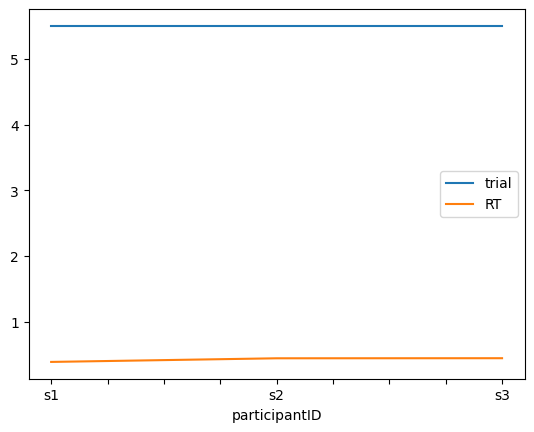

In [8]:
# calculate mean rt for each participantID
df.groupby('participantID').mean()

# calculate mean rt across participantIDs
df.groupby('participantID').mean().mean()

# calculate 95% confidence intervals for each participantID
df.groupby('participantID').mean().sem() * 1.96

# calculate 95% confidence intervals across participantIDs
df.groupby('participantID').mean().mean().sem() * 1.96

# print all of the above results in a nice format
print('Mean RT for each participantID:')
print(df.groupby('participantID').mean())
print('\nMean RT across participantIDs:')
print(df.groupby('participantID').mean().mean())
print('\n95% confidence intervals for each participantID:')
print(df.groupby('participantID').mean().sem() * 1.96)
print('\n95% confidence intervals across participantIDs:')
print(df.groupby('participantID').mean().mean().sem() * 1.96)

# plots mean RT across subjects, with 95% confidence intervals
df.groupby('participantID').mean().plot(yerr=df.groupby('participantID').mean().sem() * 1.96)

The code above does most of what we want, but it does generate another message – this time a warning, not an error. Warnings are worth looking at as well, because they can indicate that something is not quite right. Sometimes they are things like "deprecation notices", which occur when a package has changed, and the old way of doing something is no longer supported. However, this warning reads, `UserWarning: Warning: converting a masked element to nan.` What does this mean? 

